# Calculs d'impédances et de fonctions de transfert de circuits électroniques

## Premier cas : circuits bipolaires

Trois composants : résistance, capacitance, inductance

In [9]:
import sympy as sp

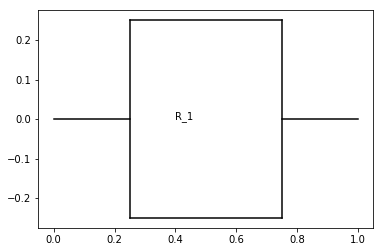

In [18]:
from circuits_bipolaires import Resistance
R1 = Resistance(sp.Symbol('R_1'))
R1.trace(0,0)

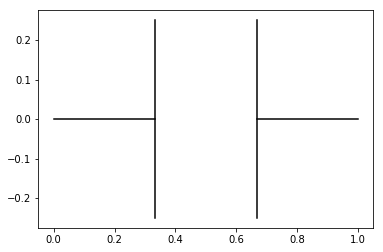

In [4]:
from circuits_bipolaires import Capacite
C1 = Capacite(sp.Symbol('C_1'))
C1.trace(0,0)

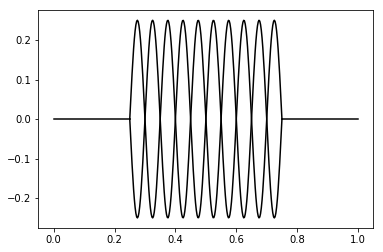

In [5]:
from circuits_bipolaires import Inductance
L1 = Inductance(sp.Symbol('L_1'))
L1.trace(0,0)

Circuit en série ou en parallèle ?

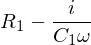

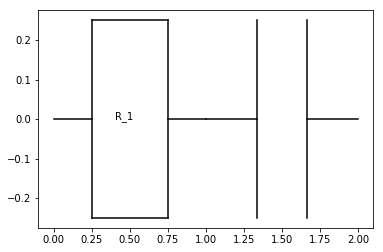

In [10]:
from circuits_bipolaires import Serie, Parallele
circuit1 = R1 + C1
circuit1.trace(0,0)

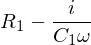

In [11]:
omega = sp.Symbol('omega')
circuit1.get_impedance(omega)

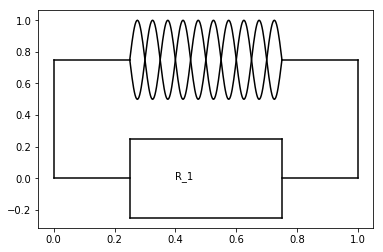

In [13]:
circuit2 = R1 | L1
circuit2.trace(0,0)

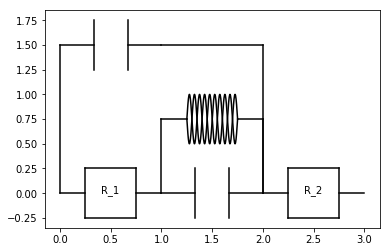

In [20]:
C2 = Capacite(sp.Symbol('C_2')); R2 = Resistance(sp.Symbol('R_2'));
circuit3 = ((R1+(C1|L1))|C2) + R2

circuit3.trace(0,0)

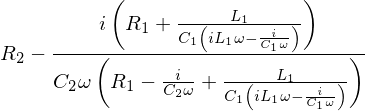

In [21]:
circuit3.get_impedance(omega)

## Deuxième cas : circuits avec des tensions imposées

Définir les noeuds et les tensions imposées ou inconnues

In [4]:
from circuits_transfert import Resistance, Capacite, Inductance, Noeud, Circuit    

E = sp.Symbol('E',real=True); S = sp.Symbol('S',real=True)
noeud1 = Noeud(E, alim=True);
noeud2 = Noeud()
noeud3 = Noeud(S)
noeud4 = Noeud(0, alim=True)

Définir les composants

In [5]:
R1 = Resistance(sp.Symbol('R_1')); R1.connect(noeud1, noeud2)
R2 = Resistance(sp.Symbol('R_2')); R2.connect(noeud2, noeud3)
R3 = Resistance(sp.Symbol('R_3')); R3.connect(noeud3, noeud4)
C1 = Capacite(sp.Symbol('C_1')); C1.connect(noeud2, noeud3)

Un circuit est défini par la donnée des noeuds et des composants

In [6]:
circuit = Circuit([noeud1,noeud2,noeud3,noeud4],[R1,R2,R3,C1])

Une méthode permet de calculer la valeur de la tension S en fonction de E (fonction de transfert)

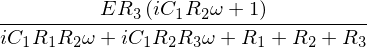

In [12]:
solutions = circuit.solve(S)
solutions